In [84]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import ast

In [85]:
df = pd.read_csv('../data/data_vacancies.csv')
df.head()

,id,custom_position,schedule,salary_from,salary_to,salary_pay_type,offer_education_id,education_name,education_is_base,education_order_num,city_id,list_regions,work_skills,tags_id
0,48202096,Сварщик-сборщик,полный рабочий день,60000,120000,NaN,0,любое,True,0,2,[4],"['сварочные работы', 'сборка изделий по чертеж...",NaN
1,48202097,Сварщик-монтажник,полный рабочий день,60000,120000,NaN,0,любое,True,0,2,[4],"['монтажные работы', 'строительные работы', 'э...",NaN
2,48202098,Слесарь-сборщик,полный рабочий день,60000,80000,NaN,0,любое,True,0,2,[4],"['работа на фрезерных станках', 'слесарный рем...",NaN
3,48202356,Грузчик-упаковщик,частичная занятость,30000,35000,NaN,0,любое,True,0,1,[3],"['комплектация товара', 'маркировка', 'стрессо...","[6, 9]"
4,48202357,Грузчик-упаковщик,частичная занятость,30000,35000,NaN,0,любое,True,0,57,"[181, 182, 183, 185, 186, 187, 188, 189, 190, ...","['маркировка', 'стрессоустойчивость', 'погрузо...","[6, 9]"


In [86]:
print(df.shape)
df.isna().sum()

(19489, 14)


id                         0
custom_position            0
schedule                   0
salary_from                0
salary_to                  0
salary_pay_type        19383
offer_education_id         0
education_name             0
education_is_base          0
education_order_num        0
city_id                    0
list_regions               0
work_skills                0
tags_id                 5999
dtype: int64

In [87]:
numeric_features = df.select_dtypes(include=[int, float]).columns.values
categorical_features = df.select_dtypes(include=[object]).columns.values
print(str(len(numeric_features)) + ' numeric features: ')
print(*numeric_features)
print(str(len(categorical_features)) + ' categorical features: ')
print(*categorical_features)

6 numeric features: 
id salary_from salary_to offer_education_id education_order_num city_id
7 categorical features: 
custom_position schedule salary_pay_type education_name list_regions work_skills tags_id


`schedule`: рабочий график

In [88]:
df.schedule.value_counts()

schedule
полный рабочий день    7462
сменный график         6126
удаленная работа       2986
свободный график       1327
вахта                  1302
частичная занятость     286
Name: count, dtype: int64

In [89]:
print(df.salary_pay_type.isna().sum())
df.salary_pay_type = df.salary_pay_type.fillna('?')
print(df.salary_pay_type.value_counts())
df = df.drop('salary_pay_type', axis=1)

19383
salary_pay_type
?        19383
net         74
gross       32
Name: count, dtype: int64


"net" обычно означает, что заработная плата выплачивается кандидату после вычета налогов и обязательных отчислений. Это чистая заработная плата, которую кандидат фактически получит на руки.

"gross" означает, что заработная плата указывается до вычета налогов и других обязательных выплат. Это общая сумма, которая может быть указана в вакансии.

В целом, из-за большого количества пропущенных значений, данный столбец проще выбросить из рассмотрения.

`education_name`: требования к уровню образования

In [90]:
print(df.education_name.value_counts())

education_name
любое                       16740
среднее профессиональное     1168
высшее                        924
среднее                       577
неполное высшее                80
Name: count, dtype: int64


Есть подозрения о том, что следует каким-то образом обработать "неполное высшее", например, на юридическом языке, бакалавриат - неполное высшее, хотя в "народе" бакалавриат принято называть высшим образованием. Надо узнать какой имеено вопрос задается работадателю при заполнении вакансии. Возможно, следует `слить` неполное высшее с высшим.

`custom_position`: наименование вакансии.

In [91]:
print(df.custom_position.value_counts())

custom_position
Продавец-кассир                                    409
Менеджер по продажам                               290
Продавец-консультант                               238
Курьер                                             193
Охранник                                           134
                                                  ... 
Автомеханик-электрик                                 1
Охранник в администрацию                             1
Ведущий специалист по охране труда                   1
Сотрудник торгового зала Обухово                     1
(Вахта) Комплектовщик на склад интернет-заказов      1
Name: count, Length: 7023, dtype: int64


7000 разных позиций, но мы видим, что одна позиция может быть подмножеством другой. Например, "Охранник", "Охранник в администрацию". `Что мы можем с этим сделать?`

`list_regions`: Этот номер вероятно связан с каким-то региональным кодом или идентификатором по которому расположена данная вакансия. Если честно, не ясно что из себя представляет данный признак.

In [92]:
df.list_regions

0                                                      [4]
1                                                      [4]
2                                                      [4]
3                                                      [3]
4        [181, 182, 183, 185, 186, 187, 188, 189, 190, ...
                               ...                        
19484                                                  [3]
19485                                                  [3]
19486                                                  [3]
19487                                                  [4]
19488                [1166, 1189, 1777, 1781, 1783, 11677]
Name: list_regions, Length: 19489, dtype: object

`tags_id`: идентификаторы тегов или категорий, связанных с вакансией. Эти идентификаторы могут использоваться для классификации или категоризации вакансий?
Думаю, стоит отбросить пока нет возомжности осмыслить данный столбец.

In [93]:
print(df.tags_id.isna().sum())
df = df.drop('tags_id', axis=1)

5999


`offer_education_id`: Вероятно, связан с образованием. Может быть идентификатором уровня образования.
`education_order_num`: По форме распределения абсолютно идентичен первому.
Выглядит так, будто в данных признаках находится одно и тоже.

In [94]:
print(df.offer_education_id.value_counts())
print(df.education_order_num.value_counts())

offer_education_id
0    16740
2     1168
4      924
1      577
3       80
Name: count, dtype: int64
education_order_num
0     16740
20     1168
10      924
25      577
15       80
Name: count, dtype: int64


Данные признаки полностью повторяют друг друга, можно полностью избавиться от одного из них.

In [95]:
for i in range(5):
    print(df[df.offer_education_id == i].education_order_num.value_counts())

education_order_num
0    16740
Name: count, dtype: int64
education_order_num
25    577
Name: count, dtype: int64
education_order_num
20    1168
Name: count, dtype: int64
education_order_num
15    80
Name: count, dtype: int64
education_order_num
10    924
Name: count, dtype: int64


In [96]:
df = df.drop('offer_education_id', axis=1)

Все значения в стобце `education_is_base` == `True`. Не понятно, каким смыслом наделен данный признак. Удалим его из рассмотрения.

In [97]:
print(df.education_is_base.value_counts())
df = df.drop('education_is_base', axis=1)

education_is_base
True    19489
Name: count, dtype: int64


`work_skills`: Признак содержит список навыков, связанных с этой вакансией.

In [98]:
df['work_skills'] = df['work_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else [])

work_skills = df.work_skills.explode().value_counts()
work_skills.nlargest(20)

work_skills
ответственность                   4896
пунктуальность                    2887
обучаемость                       2689
коммуникабельность                2396
стрессоустойчивость               2324
грамотная речь                    2161
доброжелательность                2114
работа на кассе                   1318
погрузочно-разгрузочные работы    1238
комплектация товара               1162
выкладка товара                   1098
прием товара                      1022
Работа в команде                  1016
умение работать в команде          979
прием входящих звонков             910
сбор заказов                       873
копирайтинг                        853
активные продажи                   817
доставка заказов                   808
общение с клиентами                798
Name: count, dtype: int64

In [99]:
numeric_features = df.select_dtypes(include=[int, float]).columns.values
categorical_features = df.select_dtypes(include=[object]).columns.values
print(str(len(numeric_features)) + ' numeric features: ')
print(*numeric_features)
print(str(len(categorical_features)) + ' categorical features: ')
print(*categorical_features)

5 numeric features: 
id salary_from salary_to education_order_num city_id
5 categorical features: 
custom_position schedule education_name list_regions work_skills


Средняя зарплата по `education_order_num`

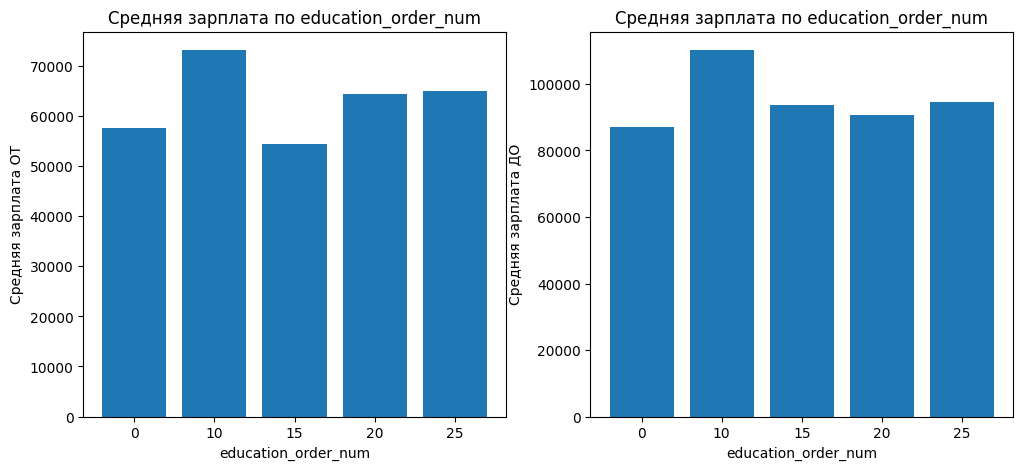

In [100]:
education_num_to = df.groupby('education_order_num')['salary_to'].mean()
education_num_from = df.groupby('education_order_num')['salary_from'].mean()

education_order_num = [str(item) for item in education_num_to.index.to_numpy()]
mean_salary_to = education_num_to.values
mean_salary_from = education_num_from.values

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(education_order_num, mean_salary_from)
ax[0].set_xlabel('education_order_num')
ax[0].set_ylabel('Средняя зарплата ОТ')
ax[0].set_title('Средняя зарплата по education_order_num')

ax[1].bar(education_order_num, mean_salary_to)
ax[1].set_xlabel('education_order_num')
ax[1].set_ylabel('Средняя зарплата ДО')
ax[1].set_title('Средняя зарплата по education_order_num')

plt.show()

Средняя зарплата по `city_id`

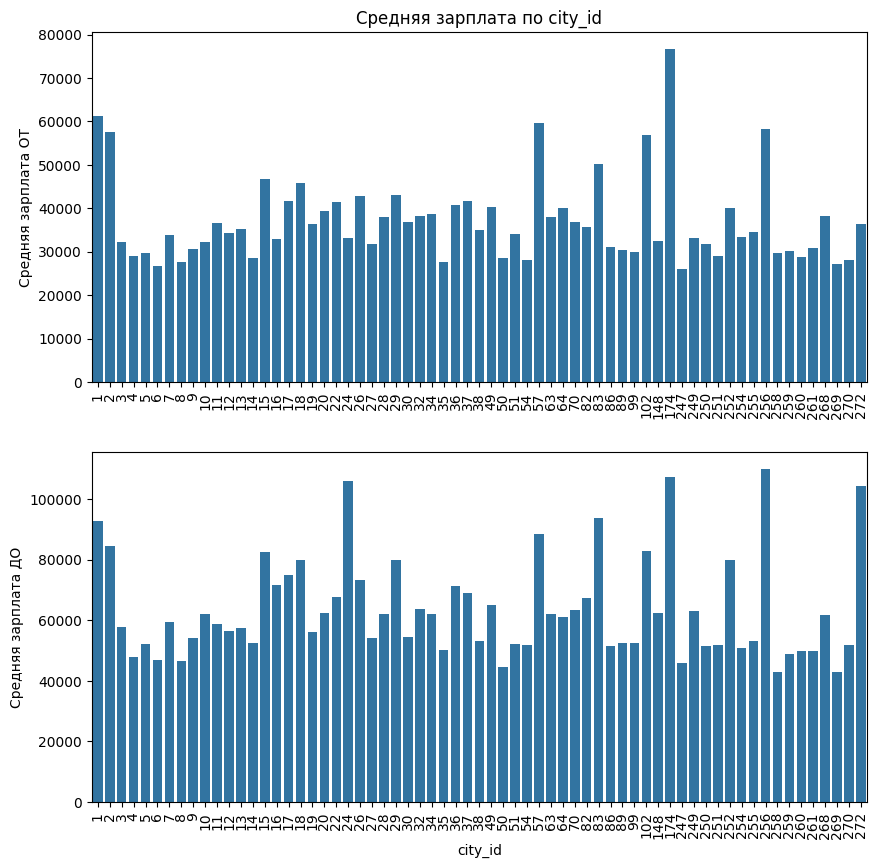

In [101]:
schedule_to = df.groupby('city_id')['salary_to'].mean()
schedule_from = df.groupby('city_id')['salary_from'].mean()

city = [str(item) for item in schedule_to.index.to_numpy()]
mean_salary_to = schedule_to.values
mean_salary_from = schedule_from.values

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

sns.barplot(x=city, y=mean_salary_from, ax=ax[0])
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(city, rotation=90)
ax[0].set_ylabel('Средняя зарплата ОТ')
ax[0].set_title('Средняя зарплата по city_id')

sns.barplot(x=city, y=mean_salary_to, ax=ax[1])
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(city, rotation=90)
ax[1].set_xlabel('city_id')
ax[1].set_ylabel('Средняя зарплата ДО')

plt.show()

Средняя зарплата по `schedule`

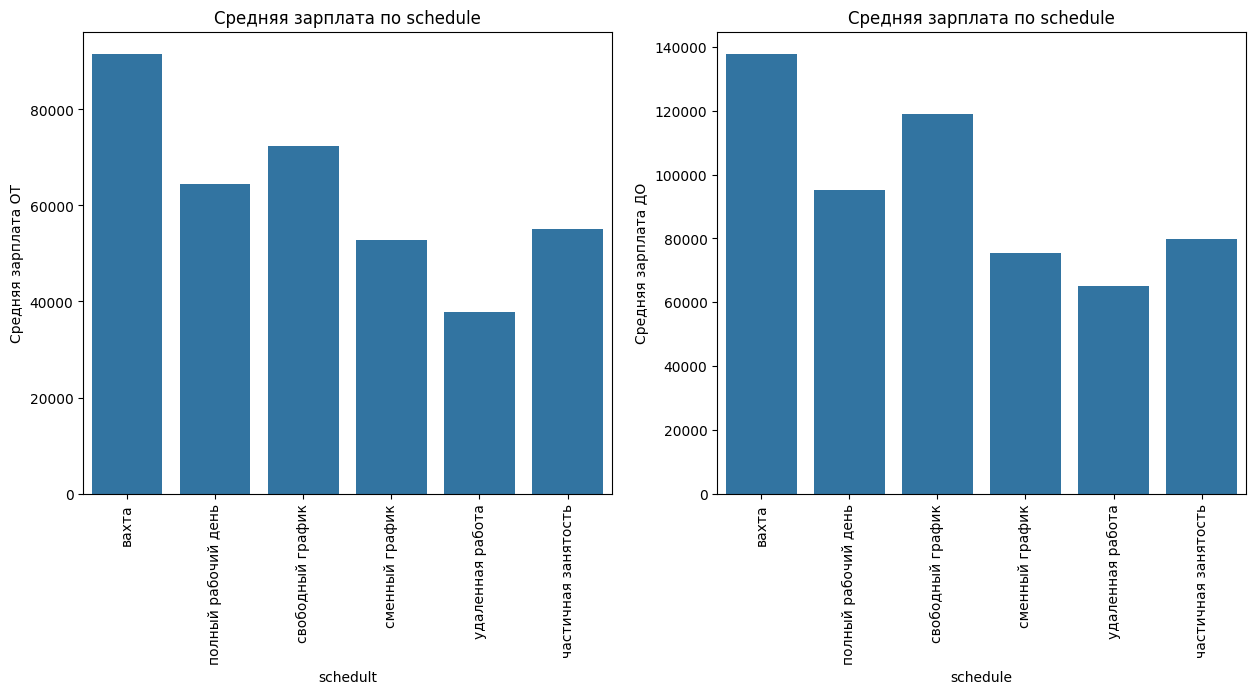

In [102]:
schedule_to = df.groupby('schedule')['salary_to'].mean()
schedule_from = df.groupby('schedule')['salary_from'].mean()

schedule = [str(item) for item in schedule_to.index.to_numpy()]
mean_salary_to = schedule_to.values
mean_salary_from = schedule_from.values

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=schedule, y=mean_salary_from, ax=ax[0])
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xlabel('schedule', )
ax[0].set_ylabel('Средняя зарплата ОТ')
ax[0].set_title('Средняя зарплата по schedule')

sns.barplot(x=schedule, y=mean_salary_to, ax=ax[1])
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(schedule, rotation=90)
ax[1].set_xlabel('schedule')
ax[1].set_ylabel('Средняя зарплата ДО')
ax[1].set_title('Средняя зарплата по schedule')

plt.show()

Средняя зарплата по `education_name`

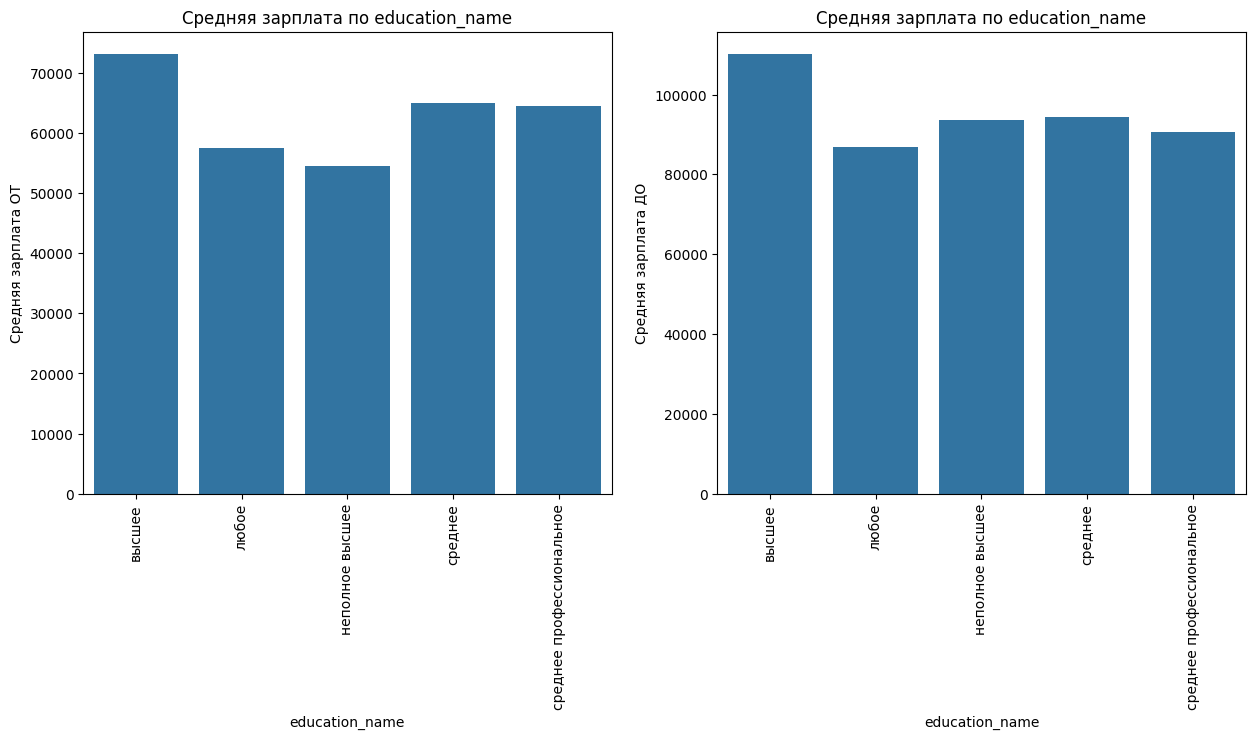

In [103]:
education_to = df.groupby('education_name')['salary_to'].mean()
education_from = df.groupby('education_name')['salary_from'].mean()

education_name = [str(item) for item in education_to.index.to_numpy()]
mean_salary_to = education_to.values
mean_salary_from = education_from.values

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=education_name, y=mean_salary_from, ax=ax[0])
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(education_name, rotation=90)
ax[0].set_xlabel('education_name')
ax[0].set_ylabel('Средняя зарплата ОТ')
ax[0].set_title('Средняя зарплата по education_name')

sns.barplot(x=education_name, y=mean_salary_to, ax=ax[1])
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(education_name, rotation=90)
ax[1].set_xlabel('education_name')
ax[1].set_ylabel('Средняя зарплата ДО')
ax[1].set_title('Средняя зарплата по education_name')

plt.show()

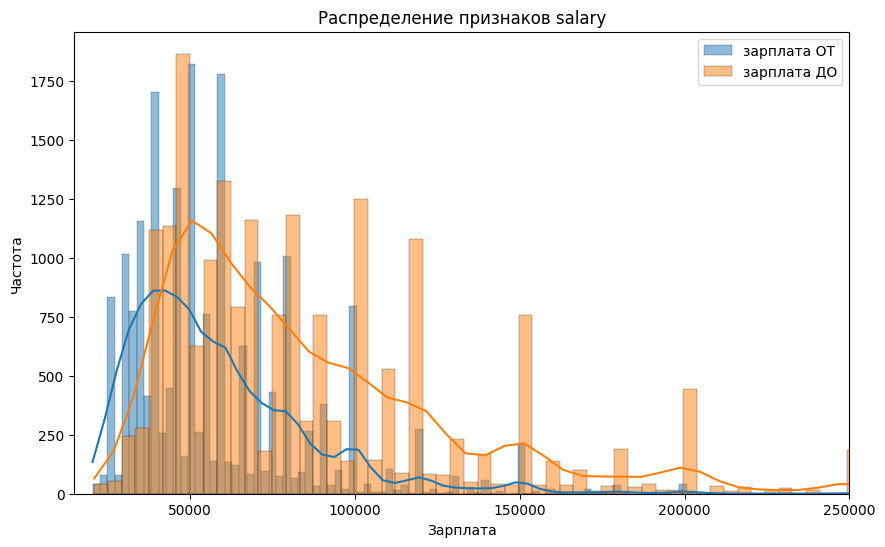

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='salary_from', kde=True, label='зарплата ОТ')
sns.histplot(data=df, x='salary_to', kde=True, label='зарплата ДО')

plt.xlabel('Зарплата')
plt.xlim(15000, 250000)
plt.ylabel('Частота')
plt.title('Распределение признаков salary')
plt.legend()

plt.show()